##**Problem to be solve:**
**Intel Image Classification**<br>
Image Scene Classification of Multiclass


###Content
This Data contains around 25k images of size 150x150 distributed under 6 categories.
{'buildings' -> 0,<br>
'forest' -> 1,<br>
'glacier' -> 2,<br>
'mountain' -> 3,<br>
'sea' -> 4,<br>
'street' -> 5 }

The Train, Test and Prediction data is separated in each zip files.<br> There are around 14k images in Train, 3k in Test and 7k in Prediction.<br>
This data was initially published on [Analyticsvidya](https://datahack.analyticsvidhya.com) by Intel to host a Image classification Challenge.

In [ ]:
#Fro Importing data from kaggle 
#Install the Kaggle first 
!pip install -q kaggle

To get the zip file (dataset)
upload the **kaggle.json** file from the folder<br>
(kaggle.json file is available in folder respective folder)

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"purushottamgupta","key":"526db0e3876df866f534a994d41bd7a1"}'}

In [2]:
#Now we rae going to craete kaggle directory
!mkdir ~/.kaggle

In [3]:
# Now se will copy the json file to folder that we have created
! cp kaggle.json ~/.kaggle/   

In [4]:
#Now we need permision to get json file act
! chmod 600 ~/.kaggle/kaggle.json



In [5]:
##Kaggle API Command for getting Data directly from Kaggle
!kaggle datasets download -d puneet6060/intel-image-classification

 97% 336M/346M [00:02<00:00, 162MB/s]
100% 346M/346M [00:02<00:00, 154MB/s]


In [6]:
import zipfile
! unzip intel-image-classification.zip

Streaming output truncated to the last 5000 lines.
  inflating: seg_train/seg_train/mountain/7506.jpg  
  inflating: seg_train/seg_train/mountain/7537.jpg  
  inflating: seg_train/seg_train/mountain/7539.jpg  
  inflating: seg_train/seg_train/mountain/7551.jpg  
  inflating: seg_train/seg_train/mountain/7560.jpg  
  inflating: seg_train/seg_train/mountain/7565.jpg  
  inflating: seg_train/seg_train/mountain/7578.jpg  
  inflating: seg_train/seg_train/mountain/7581.jpg  
  inflating: seg_train/seg_train/mountain/7586.jpg  
  inflating: seg_train/seg_train/mountain/7647.jpg  
  inflating: seg_train/seg_train/mountain/7652.jpg  
  inflating: seg_train/seg_train/mountain/7654.jpg  
  inflating: seg_train/seg_train/mountain/7662.jpg  
  inflating: seg_train/seg_train/mountain/767.jpg  
  inflating: seg_train/seg_train/mountain/7672.jpg  
  inflating: seg_train/seg_train/mountain/7679.jpg  
  inflating: seg_train/seg_train/mountain/7681.jpg  
  inflating: seg_train/seg_train/mountain/7693.jp

In [10]:
import os
for dirpath, dirnames, filenames in os.walk("seg_train/seg_train"):  
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")


There are 6 directories and 0 images in 'seg_train/seg_train'.
There are 0 directories and 2191 images in 'seg_train/seg_train/buildings'.
There are 0 directories and 2274 images in 'seg_train/seg_train/sea'.
There are 0 directories and 2271 images in 'seg_train/seg_train/forest'.
There are 0 directories and 2512 images in 'seg_train/seg_train/mountain'.
There are 0 directories and 2382 images in 'seg_train/seg_train/street'.
There are 0 directories and 2404 images in 'seg_train/seg_train/glacier'.


To get the Labels of dataset

In [7]:
import pathlib
from pathlib import Path
data_dir = pathlib.Path("seg_train/seg_train")
# created a list of class_names from the subdirectories
class_names = sorted([item.name for item in data_dir.glob('*')])
class_names


['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

In [ ]:
# import matplotlib.image as mpimg
# path = pathlib.Path("seg_test/seg_test")

# label_dict = {'buildings':0, 'forest':1, 'glacier':2, 'mountain':3, 'sea':4, 'street':5}

# Dirs= path.glob("*")
# image_data = []
# labels = []

# cnt =0
# for folder_dir in Dirs:
#   label = str(folder_dir).split("/")[-1]
#   print(label)
#   for img_path in folder_dir.glob("*"):
#     #print(img_path)
#     labels.append(label_dict[label])
#     cnt+=1
   
# print(labels)   



###Helper function for visualizing the images from the Intel dataset

In [8]:
#Now lets Visual of data 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def show_image(target_dir, target_class):
   target_folder = target_dir +  target_class #outpu: seg_train/seg_train/forest
   random_image = random.sample(os.listdir(target_folder),1)
   read_image = mpimg.imread(target_folder+"/" + random_image[0])
   
   plt.imshow(read_image),print(target_class)
   print(f"Image shape: {read_image.shape}") # show the shape of the image
 #  print(target_folder)
 #  print(random_image)

   return read_image


buildings
Image shape: (150, 150, 3)
forest
Image shape: (150, 150, 3)
glacier
Image shape: (150, 150, 3)
mountain
Image shape: (150, 150, 3)
sea
Image shape: (150, 150, 3)
street
Image shape: (150, 150, 3)


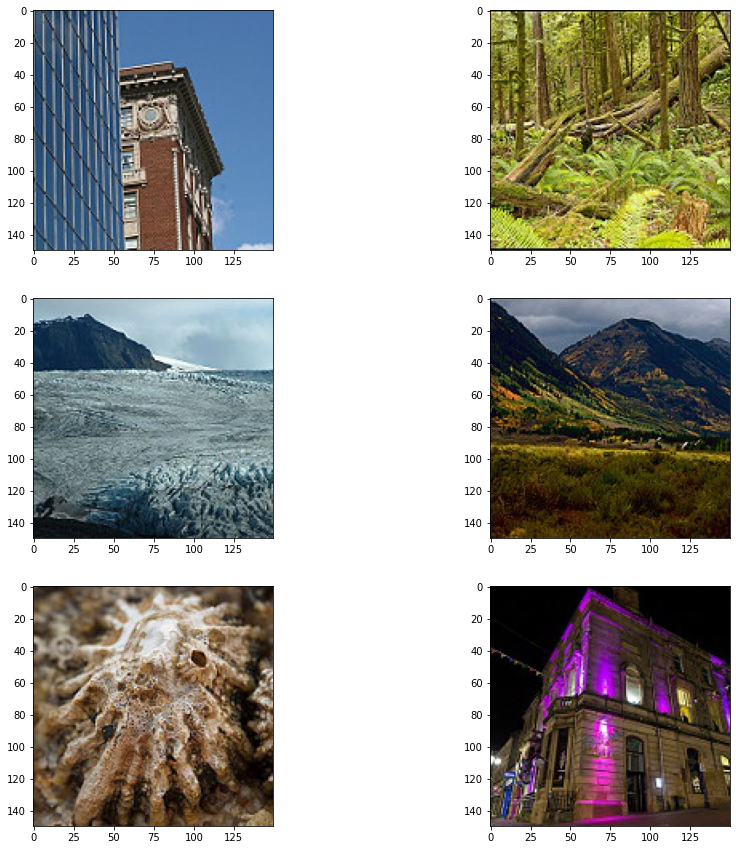

In [11]:
# View a random image from the training dataset
plt.figure(figsize=(15, 15))

plt.subplot(3,2,1)
building = show_image("seg_train/seg_train/", "buildings")
plt.subplot(3,2,2)
forest = show_image("seg_train/seg_train/", "forest")

plt.subplot(3,2,3)
glacier = show_image("seg_train/seg_train/", "glacier")
plt.subplot(3,2,4)
mountain = show_image("seg_train/seg_train/", "mountain")
plt.subplot(3,2,5)
sea = show_image("seg_train/seg_train/", "sea")
plt.subplot(3,2,6)
street = show_image("seg_train/seg_train/", "street")

                        

In [12]:
forest.shape #Return width, height and color channel(RGB)

(150, 150, 3)

In [13]:
forest.max(), forest.min() # Max & Min Pixel size

(255, 0)

#Machine learning models, including neural networks prefer the values they work with to be between 0 and 1.
**Lets Normalize the data**

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen= ImageDataGenerator(rescale=1./forest.max())
test_datagen = ImageDataGenerator(rescale=1./forest.max())

#locate the train and test directories
train_dir = "seg_train/seg_train/"
test_dir =  "seg_test/seg_test/"

train_data = train_datagen.flow_from_directory(train_dir,
                                  batch_size = 32,
                                  target_size = (224,224),
                                  class_mode = "categorical",
                                  seed =42)

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size =32,
                                             target_size = (224,224),
                                             class_mode = "categorical",
                                             seed = 42)




Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


#Defined function for loss Curve
here we get loss curve for train data as well as test data 

In [15]:
def plot_loss_curve(history):

  train_loss =history.history["loss"]
  train_accuracy = history.history["accuracy"]

  val_loss =history.history["val_loss"]
  val_accuracy = history.history["val_accuracy"]
  epochs = range(len(history.history['loss']))
  plt.figure(figsize =(15,5))
  plt.subplot(1,2,1)
#plot
  plt.plot(epochs, train_loss, label ="Training_Loss")
  plt.plot(epochs, val_loss, label ="Val_loss")
  plt.legend()

#plot
  plt.subplot(1,2,2)
  plt.plot(epochs, train_accuracy, label= "Train_accuracy")
  plt.plot(epochs, val_accuracy, label ="Val_accuracy") 
  plt.legend()



##**First Model:**
Here after each convolution layer we are try to carry out maxpooling<br>
optimizer function used here **Adam()** and model is run for 10 epochs.

In [18]:
# Now lets create the model

tf.random.set_seed(42)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters =10,
                           kernel_size= (3,3),
                           activation ="relu",
                           input_shape = (224,224,3)),

    tf.keras.layers.MaxPool2D(pool_size =(2,2)),
                              
                            
    tf.keras.layers.Conv2D(filters = 10,
                            kernel_size =(3,3),
                            activation = "relu"),
                             
    tf.keras.layers.MaxPool2D(pool_size =(2,2)),
                               
    tf.keras.layers.Conv2D(filters =10,
                           kernel_size = (3,3),
                           activation = "relu"),     

    tf.keras.layers.MaxPool2D(pool_size= (2,2)), 

    tf.keras.layers.Flatten(),
   # tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(6, activation ="softmax")])

#Compile the model

model_1.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.005),
              metrics = ["accuracy"])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
#Fit the model


history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data), validation_data = test_data,
                        validation_steps = len(test_data),callbacks =[lr_schedular]
                        )

Epoch 1/10
439/439 [==============================] - 34s 77ms/step - loss: 1.0051 - accuracy: 0.6115 - val_loss: 0.8287 - val_accuracy: 0.6860
Epoch 2/10
439/439 [==============================] - 33s 74ms/step - loss: 0.7608 - accuracy: 0.7193 - val_loss: 0.7175 - val_accuracy: 0.7373
Epoch 3/10
439/439 [==============================] - 33s 75ms/step - loss: 0.6559 - accuracy: 0.7651 - val_loss: 0.6732 - val_accuracy: 0.7557
Epoch 4/10
439/439 [==============================] - 33s 76ms/step - loss: 0.5858 - accuracy: 0.7874 - val_loss: 0.6917 - val_accuracy: 0.7633
Epoch 5/10
439/439 [==============================] - 35s 79ms/step - loss: 0.5080 - accuracy: 0.8158 - val_loss: 0.7607 - val_accuracy: 0.7310
Epoch 6/10
439/439 [==============================] - 34s 78ms/step - loss: 0.4530 - accuracy: 0.8391 - val_loss: 0.7332 - val_accuracy: 0.7607
Epoch 7/10
439/439 [==============================] - 34s 78ms/step - loss: 0.3721 - accuracy: 0.8681 - val_loss: 0.8800 - val_accuracy:

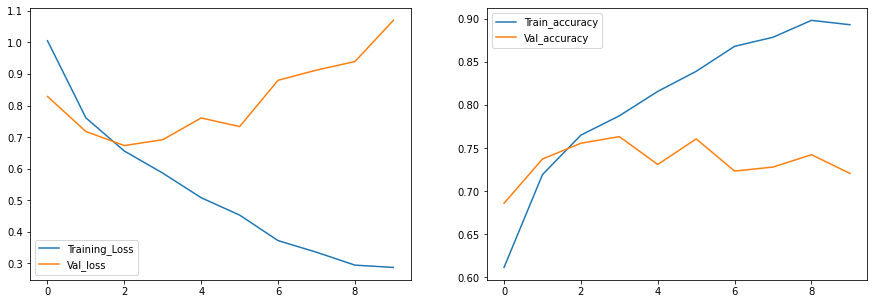

In [19]:
plot_loss_curve(history_1)

In [20]:
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6760)             

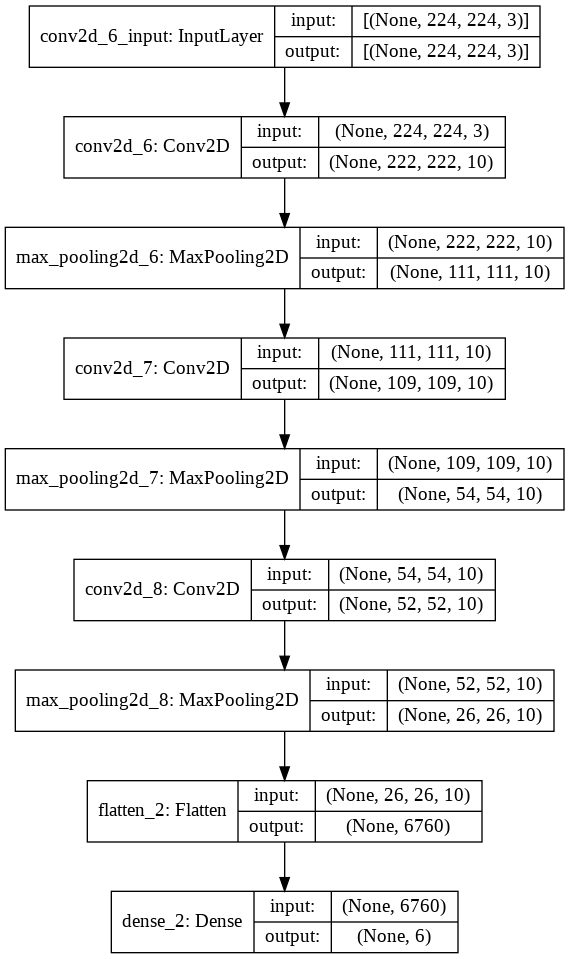

In [31]:
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_1, show_shapes=True)

###**Obervation on first model:**
Ideal position for these two curves is to follow each other. If anything, the validation curve should be slightly under the training curve. If there's a large gap between the training curve and validation curve, it means model is probably overfitting.<br>

Model is overfiting (e.g. the validation loss keeps increasing), we can avoid overfitting using data augmentation.

##**Data Augmentation**
It involve adjusting the rotation of an image, flipping it, cropping it or something similar.

In [21]:
# Let set the seed
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

train_datagen= ImageDataGenerator(rescale=1./255,
                                  rotation_range=20, # rotate the image slightly between 0 and 20 degrees (note: this is an int not a float)
                                  shear_range=0.2, # shear the image
                                  zoom_range=0.2, # zoom into the image
                                  width_shift_range=0.2, # shift the image width ways
                                  height_shift_range=0.2, # shift the image height ways
                                  horizontal_flip=True) # flip the image on the horizontal axis)
test_datagen = ImageDataGenerator(rescale=1./forest.max())

#locate the train and test directories
train_dir = "seg_train/seg_train/"
test_dir =  "seg_test/seg_test/"

train_data_aug = train_datagen.flow_from_directory(train_dir,
                                  batch_size = 32,
                                  target_size = (224,224),
                                  class_mode = "categorical",
                                  shuffle=True)

test_data = test_datagen.flow_from_directory(test_dir,
                                             batch_size =32,
                                             target_size = (224,224),
                                             class_mode = "categorical",
                                             seed = 42)




Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


In [22]:
# Now lets create the model

tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters =20,
                           kernel_size= (3,3),
                           activation ="relu",
                           input_shape = (224,224,3)),

    tf.keras.layers.MaxPool2D(pool_size =(3,3)),
                              
                            
    tf.keras.layers.Conv2D(filters = 20,
                            kernel_size =(3,3),
                            activation = "relu"),
                             
    tf.keras.layers.MaxPool2D(pool_size =(3,3)),
                               
    tf.keras.layers.Conv2D(filters =20,
                           kernel_size = (3,3),
                           activation = "relu"),     

    tf.keras.layers.MaxPool2D(pool_size= (3,3)), 

    tf.keras.layers.Flatten(),
   # tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(6, activation ="softmax")])

#Compile the model

model_2.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(),
              metrics = ["accuracy"])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
#Fit the model


history_2 = model_2.fit(train_data_aug,
                        epochs=10,
                        steps_per_epoch=len(train_data_aug), validation_data = test_data,
                        validation_steps = len(test_data),callbacks =[lr_schedular]
                        )

Epoch 1/10
439/439 [==============================] - 170s 385ms/step - loss: 1.1780 - accuracy: 0.5379 - val_loss: 1.0215 - val_accuracy: 0.6270
Epoch 2/10
439/439 [==============================] - 171s 390ms/step - loss: 0.9319 - accuracy: 0.6496 - val_loss: 0.7674 - val_accuracy: 0.7280
Epoch 3/10
439/439 [==============================] - 171s 390ms/step - loss: 0.8353 - accuracy: 0.6889 - val_loss: 0.7953 - val_accuracy: 0.7063
Epoch 4/10
439/439 [==============================] - 169s 384ms/step - loss: 0.7798 - accuracy: 0.7151 - val_loss: 0.6671 - val_accuracy: 0.7647
Epoch 5/10
439/439 [==============================] - 172s 392ms/step - loss: 0.7393 - accuracy: 0.7305 - val_loss: 0.7108 - val_accuracy: 0.7480
Epoch 6/10
439/439 [==============================] - 169s 385ms/step - loss: 0.7121 - accuracy: 0.7411 - val_loss: 0.5707 - val_accuracy: 0.8020
Epoch 7/10
439/439 [==============================] - 171s 390ms/step - loss: 0.6832 - accuracy: 0.7544 - val_loss: 0.6310 -

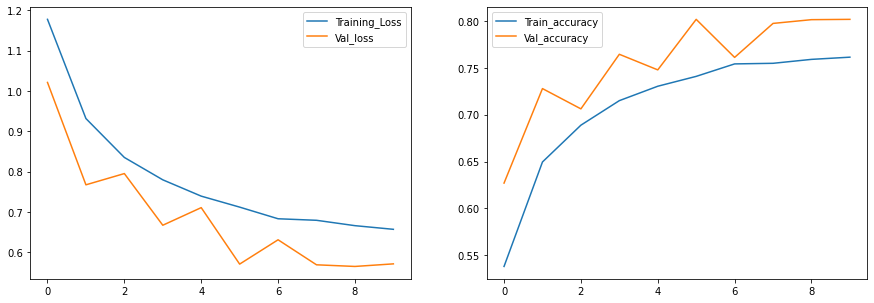

In [23]:
plot_loss_curve(history_2)

Text(0, 0.5, 'Loss')

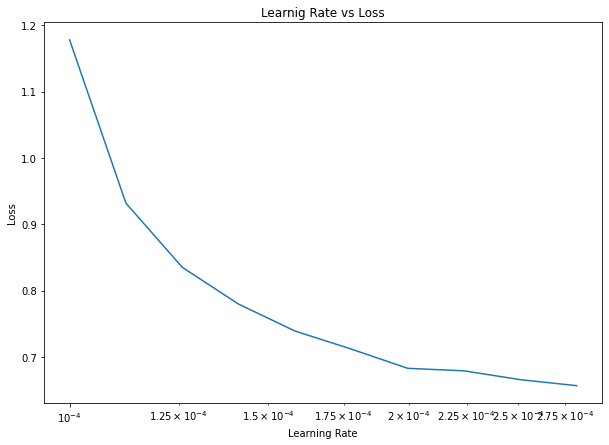

In [25]:
# Plot the learning rate versus the loss
import numpy as np
lrs = 1e-4 * (10 ** (np.arange(10)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_2.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.title("Learnig Rate vs Loss")
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

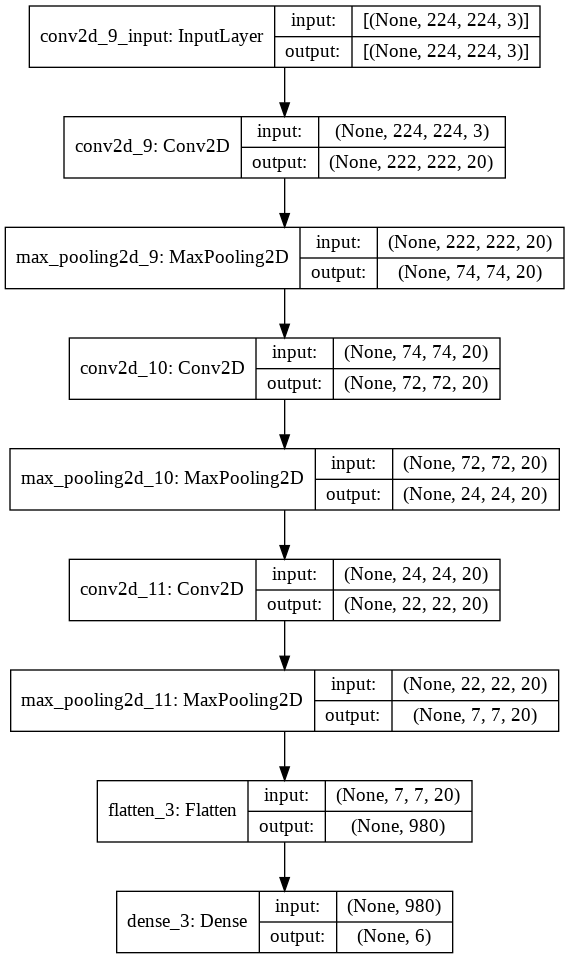

In [32]:
from tensorflow.keras.utils import plot_model
# See the inputs and outputs of each layer
plot_model(model_2, show_shapes=True)

##**Final Model**
In this **model** i have slighly change the learning rate <br>**(default lr = 0.001)** replaced with **learning rate = 0.0001**

In [27]:
# Now lets create the model

tf.random.set_seed(42)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters =20,
                           kernel_size= (3,3),
                           activation ="relu",
                           input_shape = (224,224,3)),

    tf.keras.layers.MaxPool2D(pool_size =(3,3)),
                              
                            
    tf.keras.layers.Conv2D(filters = 20,
                            kernel_size =(3,3),
                            activation = "relu"),
                             
    tf.keras.layers.MaxPool2D(pool_size =(3,3)),
                               
    tf.keras.layers.Conv2D(filters =20,
                           kernel_size = (3,3),
                           activation = "relu"),     

    tf.keras.layers.MaxPool2D(pool_size= (3,3)), 

    tf.keras.layers.Flatten(),
   # tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(6, activation ="softmax")])

#Compile the model

model_3.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr= 1e-4),
              metrics = ["accuracy"])

lr_schedular = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
#Fit the model


history_3 = model_3.fit(train_data_aug,
                        epochs=10,
                        steps_per_epoch=len(train_data_aug), validation_data = test_data,
                        validation_steps = len(test_data),callbacks =[lr_schedular]
                        )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
439/439 [==============================] - 174s 394ms/step - loss: 1.1967 - accuracy: 0.5231 - val_loss: 0.9329 - val_accuracy: 0.6580
Epoch 2/10
439/439 [==============================] - 170s 388ms/step - loss: 0.9519 - accuracy: 0.6403 - val_loss: 0.7591 - val_accuracy: 0.7343
Epoch 3/10
439/439 [==============================] - 176s 400ms/step - loss: 0.8568 - accuracy: 0.6811 - val_loss: 0.6770 - val_accuracy: 0.7653
Epoch 4/10
439/439 [==============================] - 175s 399ms/step - loss: 0.8170 - accuracy: 0.7004 - val_loss: 0.6827 - val_accuracy: 0.7600
Epoch 5/10
439/439 [==============================] - 176s 400ms/step - loss: 0.7614 - accuracy: 0.7212 - val_loss: 0.6735 - val_accuracy: 0.7690
Epoch 6/10
439/439 [==============================] - 176s 401ms/step - loss: 0.7268 - accuracy: 0.7334 - val_loss: 0.7188 - val_accuracy: 0.7590
Epoch 7/10
439/439 [==============================] - 174s 396ms/step - loss: 0.7092 - accuracy: 0.7421 - val_loss: 0.6658 -

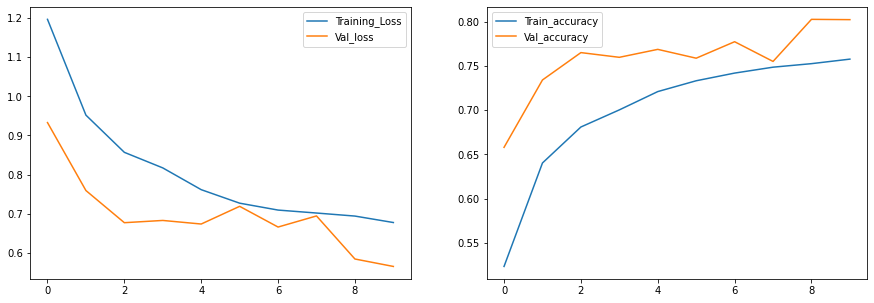

In [28]:
plot_loss_curve(history_3)

In [33]:
pred_3 = model_3.predict(test_data)




###**Scope for Improvement**
There are a few things we could try to continue to improve our model:
* Increase the number of model layers (add more convolutional layers).
* Increase the number of filters in each convolutional layer (e.g. 32, 64, or 128.
* Train for longer (more epochs).
* Finding an ideal learning rate.
* Get more data (give the model more opportunities to learn).

Adjusting each of these settings during model development is usually referred to as **hyperparameter tuning**.




